### Running Simulation Model
##### Jack Tobin
##### 30 September 2021

First we'll import some packages and the simulation class we constructed earlier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm
import seaborn as sns
from simulation import Simulation

Next we'll set some high-level simulation paramters such as initial wealth, return and stdevs etc.

In [2]:
# set model parameters
initial_wealth = 1000 # £1000
ann_return = 0.09
ann_stdev = 0.18
num_trials = 10000
num_years = 40

Next we'll build the Simulation object and run it.

In [3]:
# instantiate Simulation class
sim = Simulation(initial_wealth, ann_return, ann_stdev, num_trials, num_years)

# run the model
sim.simulate_values()

# get returns and values generated by the model as nice dataframes
values = pd.DataFrame(sim.values)
ann_returns = pd.DataFrame(sim.returns)
daily_returns = pd.DataFrame(sim.daily_returns)

# display
values.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1000.0,1124.938101,1627.077880,1770.963114,1707.504918,1533.833287,1867.936176,1977.442284,2077.878884,2199.863115,...,19003.987469,24502.155904,25980.993240,31197.603602,35298.962562,35917.395903,44160.741558,48459.823536,52683.714358,64029.544931
1,1000.0,1358.005292,1732.227252,2133.064652,1858.835796,2343.232203,2585.418111,3392.149700,2660.316939,3396.696868,...,5843.353631,6593.435577,8705.776573,7643.699622,8095.181080,8789.476095,9584.857206,10613.285159,9472.067556,12963.084584
2,1000.0,917.037272,1112.282668,1876.677673,2166.889349,2098.137233,2608.712446,2776.839550,2994.415540,3017.912221,...,29485.036547,29296.849310,28381.623658,38654.235664,43941.926528,60156.491408,63503.787556,107068.461850,94707.484429,115484.348707
3,1000.0,1095.337148,1305.441119,1330.230427,1939.621726,2399.768002,3317.634379,3204.211317,3547.204888,3585.419125,...,21187.923780,18453.353174,21204.095796,19344.231622,21637.382420,24008.986125,20440.522117,20839.681326,20152.625394,15532.682937
4,1000.0,1348.051665,1502.708414,2236.594246,2258.934367,1939.499209,1737.084717,1803.136924,1944.883867,2572.862588,...,26535.503563,29854.372868,27077.192628,39982.620827,43796.694444,46530.883288,63405.905788,58293.533965,52528.058113,52198.418012


Lets plot a sample of 100 paths.

Text(0.5, 0.98, '100 Simulated Portfolios')

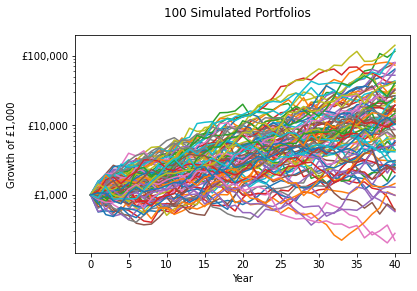

In [4]:
# subset
n_paths = 100
sample = values.loc[:n_paths, :].copy()

# create plot
fig, ax = plt.subplots(1)
for i in range(len(sample)):
    ax.plot(sample.loc[i, :])
ax.set_yscale('log') # to control for visual scale
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}')) # £ format
ax.set_xlabel('Year')
ax.set_ylabel('Growth of £1,000')
fig.suptitle(str(n_paths) + ' Simulated Portfolios')

Next we'll show the 25th, 50th and 75th percentile across all simulated portfolios over time.

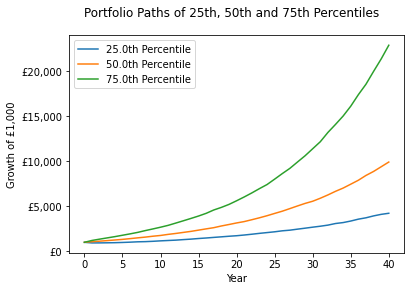

In [5]:
# convert values to the three percentiles
qs = [0.25, 0.50, 0.75]
percentiles = values.quantile(q=qs, axis=0)

# make plot
fig, ax = plt.subplots(1)
for q in qs:
    ax.plot(percentiles.loc[q, :], label='%sth Percentile' % str(round(q * 100,0)))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}')) # £ format
ax.set_xlabel('Year')
ax.set_ylabel('Growth of £1,000')
fig.suptitle('Portfolio Paths of 25th, 50th and 75th Percentiles')
ax.legend(loc='upper left')

Next let's plot a histogram of the portfolio returns to visualize any skew we generated with the markov chain process.

[ 0.00114736  0.01296867 -0.00057821 ...  0.00791209 -0.00965979
  0.02378434]


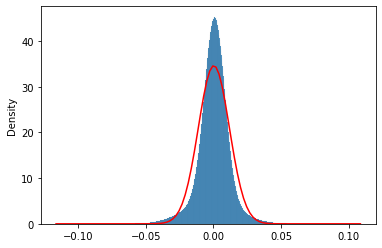

In [6]:
# daily returns
rets = daily_returns.to_numpy().ravel()

# visualize to check we have a 1D array
print(rets)

# create initial histogram plot
fig, ax = plt.subplots(1)
sns.histplot(rets, kde=False, stat='density', ax=ax)

# overlay normal distribution
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
mu, std = norm.fit(rets)
x_pdf = np.linspace(x0, x1, 100)
y_pdf = norm.pdf(x_pdf, mu, std)
ax.plot(x_pdf, y_pdf, color='red')

Based on the histogram with overlayed normal distribution we can see that the simulated data is fat tailed i.e. relatively higher frequency of both near-zero and extreme values with relatively lower occurrence of in-between values compared with that of a normal distribution.

This shows that we've successfully simulated returns that exhibit the 'fat tails' of actual return distributions. Our simulated returns have both a higher chance of small returns and extremely negative returns compared with what a normal distribution would predict.